In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
import duckdb

In [4]:
conn = duckdb.connect(database="database/verihubs.duckdb", read_only=True)

In [6]:
df = conn.execute("SELECT * FROM daily_order_status").df()

In [ ]:
df_pivoted = df.pivot_table(index='day', columns='Status', values='order_count')

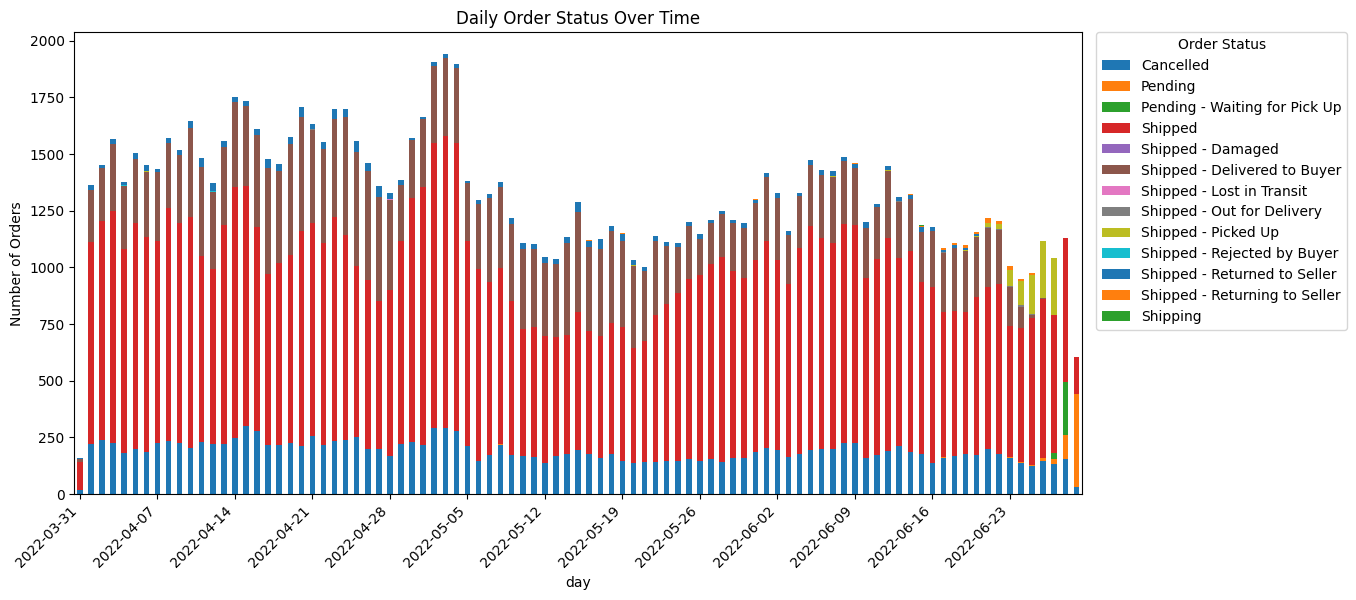

In [92]:
fig, ax = plt.subplots(figsize=(13, 6))
df_pivoted.plot(kind='bar', stacked=True, rot=90, ax=ax)
ax.xaxis.set_major_formatter(plt.FixedFormatter(df_pivoted.index.strftime('%Y-%m-%d')))
ax.set_xticks(range(0, len(df_pivoted.index), 7))
ax.set_xticklabels(df_pivoted.index.strftime('%Y-%m-%d')[::7], rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.27, 1.015), loc='upper right', title='Order Status')
plt.title('Daily Order Status Over Time')
plt.ylabel("Number of Orders")
plt.show()

In [72]:
df_rev = conn.execute("SELECT * FROM monthly_category_sales").df()

In [78]:
df_rev

,month,Category,total_amount
0,2022-03-01,Blouse,280.00
1,2022-03-01,Ethnic Dress,1099.00
2,2022-03-01,Set,53884.00
3,2022-03-01,Top,4511.00
4,2022-03-01,Western Dress,7653.28
5,2022-03-01,kurta,34256.57
6,2022-04-01,Blouse,195583.21
7,2022-04-01,Bottom,63308.45
8,2022-04-01,Ethnic Dress,250666.65
9,2022-04-01,Saree,55655.24


In [80]:
df_rev_pivot = df_rev.pivot_table(index="month", columns="Category", values="total_amount")

<Axes: xlabel='month'>

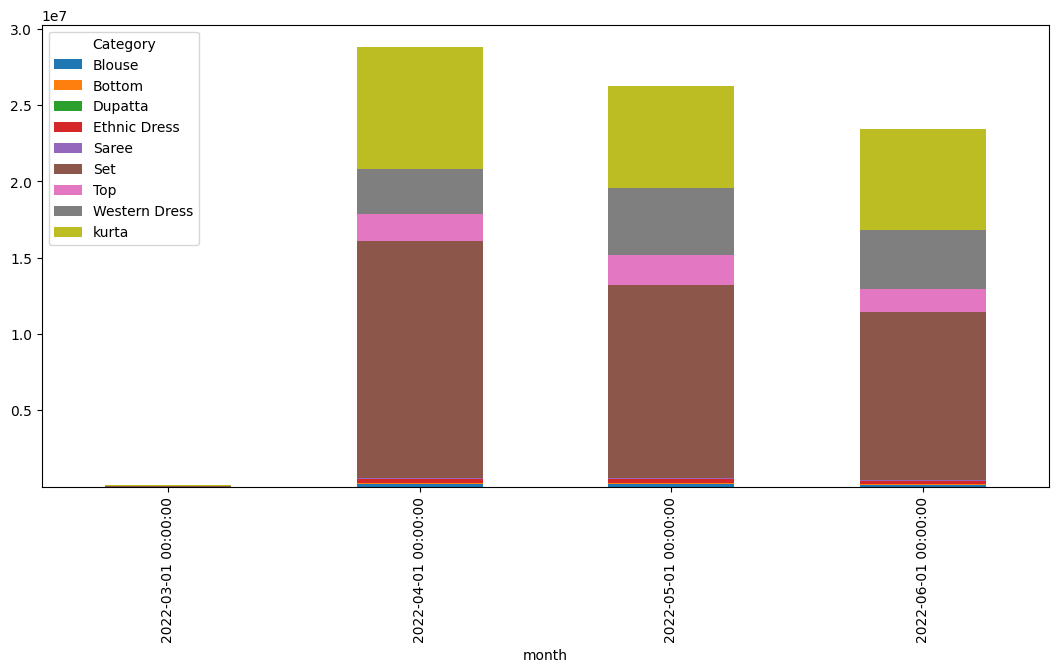

In [82]:
df_rev_pivot.plot(kind='bar', stacked=True, figsize=(13, 6))